**DB 불러오기**

In [1]:
import numpy as np
import pandas as pd

In [31]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
tr = pd.read_csv("./TITANIC/train.csv")
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tr.columns = tr.columns.str.lower() #소문자 변형

# <font size=6><b> lec10.머신러닝_전처리 : Object 변수

## 범주형 변수 categorical data 처리

<글자를 숫자로 바꾸기>
* 라벨인코딩(Label Encoding)
* 원핫인코딩(One-hot Encoding)
* get_dummies()
* df[컬럼].astype("category")  
  
<범주화>  
* 범주화(Bining)

## (1) 라벨인코딩(Label Encoding) 
        
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현
> * 글자를 숫자로 바꾸기

In [5]:
# 설치 위해서 pip 버전 2.30 이상 필요(2023.02.14 기준)
#!pip install scikit-learn

In [6]:
#머신러닝의 대표적 패키지
# self 함수는 인자 (a=함수)과정이 꼭 필요한 종류라서, import할 때 클래스를 불러와서 인자를 설정해야 한다.

#fit : 전체 데이터를 메모리에 올려놓고, distinct 값 찾는 것

from sklearn.preprocessing import LabelEncoder #----------신규(클래스명)

In [17]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [18]:
le = LabelEncoder() #클래스이름() == 생성자 함수 : 초기화
le.fit(df['name'])
#df에 있는 'name'값을 피팅하겠다. 떼거지도 가능.
# **주의 : 변수에 받을 수 없다. (메모리 상에 피팅하는 것이기 때문에, 결과를 반환 받을 수 없다?)
# fit 하는 순간 메모리에 라벨 인코딩을 한다. 메모리가 계산작업 시작.

res = le.transform(df['name'])
print(df['name'].values) # 핏 하는 순간 네임을 라벨 인코더한 값.
print(res)

['smith' 'martin' 'jones' 'allen' 'king']
[4 3 1 0 2]


In [19]:
le = LabelEncoder() #클래스이름() == 생성자 함수 : 초기화
le.fit(df['score']) #df에 있는 'score'값을 피팅하겠다. 떼거지도 가능. **주의 : 변수에 받을 수 없다. (메모리 상에 피팅하는 것이기 때문에, 결과를 반환 받을 수 없다?)
# fit 하는 순간 메모리에 라벨 인코딩을 한다.

resb = le.transform(df['score'])
print(df['score'].values) # 핏 하는 순간 스코어를 라벨 인코더한 값.
print(resb)

['A' 'B' nan 'A' 'C']
[0 1 3 0 2]


In [18]:
le = LabelEncoder() #클래스이름() == 생성자 함수 : 초기화
le.fit(df['name']) #df에 있는 'name'값을 피팅하겠다. 떼거지도 가능. **주의 : 변수에 받을 수 없다. (메모리 상에 피팅하는 것이기 때문에, 결과를 반환 받을 수 없다?)
# fit 하는 순간 메모리에 라벨 인코딩을 한다.

res = le.transform(df['name'])
print(df['name'].values) # 핏 하는 순간 네임을 라벨 인코더한 값.
print(res)

['smith' 'martin' 'jones' 'allen' 'king']
[4 3 1 0 2]


In [26]:
#array를 그냥 create한다. 값이 들어간다.
df['le_name']=res

df.head()

,name,score,le_name
0,smith,A,4
1,martin,B,3
2,jones,NaN,1
3,allen,A,0
4,king,C,2


## (2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터(1차원:한줄)의 차원으로 하고,  
    표현하고 싶은 단어(나만)의 인덱스에 1의 값을 부여하고, 다른 인덱스(그 외)에는 0을 부여하는 벡터 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음(=반드시 2차원으로) → reshape(-1,1)을 이용해 Matrix로 변환  (N,)(=array의 shape) → (N,1)

In [35]:
#패키지ㅡ패키지ㅡ클래스
from sklearn.preprocessing import OneHotEncoder

In [30]:
df['score'].values                     #시리즈 : 1차 vector

array(['A', 'B', nan, 'A', 'C'], dtype=object)

In [32]:
df['score'].shape , df.shape

((5,), (5, 3))

In [130]:
#df의 모양을 변경하values떨어지지 않으면 에러)
#(row는 알겠는데 컬럼값은 모르겠을 때 : -1 => 컴퓨터가 알아서 해준다)

df['score'].values.reshape(-1,1)                                      #2차 matrix
#줄(헹)은 몇줄이어도 상관없지만 칸(열)은 1칸으로 해줘라 : 2차로 변경됨 [[ ]]

array([['A'],
       ['B'],
       [nan],
       ['A'],
       ['C']], dtype=object)

In [38]:
oe = OneHotEncoder()
oe.fit(df['score'].values.reshape(-1,1) ) #fit할 때, 2차 매트릭스를 넣어줘라
res = oe.transform(df['score'].values.reshape(-1,1))
res

#sparse matrix : 희소 행렬 . 행렬 안에 든 원소가 희소한 행렬(0이 많다.)
print(res)
#메모리 아끼려고 아래처럼 출력 된다.

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (4, 2)	1.0


In [39]:
oe = OneHotEncoder(sparse=False) #희소값 false
oe.fit(df['score'].values.reshape(-1,1) ) #fit할 때, 2차 매트릭스를 넣어줘라
res = oe.transform(df['score'].values.reshape(-1,1))
res

#sparse matrix : 희소 행렬 . 행렬 안에 든 원소가 희소한 행렬(0이 많다.)
print(res) #결측이 있어서 float으로 나온다. 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [48]:
#oe의 카테고리 명이 뭡니까?

print(oe.categories_)

[array(['A', 'B', 'C', nan], dtype=object)]


In [49]:
#array(카테고리) 추출하기
#array로 뱉으니까 순서 지정해주기

print(oe.categories_[0])

['A' 'B' 'C' nan]


In [50]:
#2차원은 df로 만들기 가장 편하다. 그냥 넣기만 하면 됨.
# 컬럼명은 위에 카테고리명 추출한 것을 넣는다.

ohdf = pd.DataFrame(res,columns = oe.categories_[0] )
ohdf

,A,B,C,NaN
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [51]:
                # 원본 + 2차원
totdf = pd.concat([df,ohdf],axis = 1)
totdf

,name,score,le_name,A,B,C,NaN
0,smith,A,4,1.0,0.0,0.0,0.0
1,martin,B,3,0.0,1.0,0.0,0.0
2,jones,NaN,1,0.0,0.0,0.0,1.0
3,allen,A,0,1.0,0.0,0.0,0.0
4,king,C,2,0.0,0.0,1.0,0.0


## (3) get_dummies()  
    * 결측처리+라벨인코딩(Label Encoding)+원핫인코딩(One-hot Encoding)

In [52]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [53]:
ddf = pd.get_dummies(df)
ddf

#1.이름이 컬럼자리로 올라오고, 하나하나 나는 핫해 표시하느라 길어짐.
# 레코드 2천갠데 생성하면? : 유니크한 도메인 갯수만큼 2천개 생긴다. 우리 눈엔 어렵지만, 컴퓨터 눈엔 보기 좋은 형태
# fillna 안해주면 자동으로 0으로 채운다. ex) 2행의 score = 0
# 자동결측처리 하기 전에 원하는 결측 처리 먼저 하기!

,name_allen,name_jones,name_king,name_martin,name_smith,score_A,score_B,score_C
0,0,0,0,0,1,1,0,0
1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1


## (4) category타입
> * df['컬럼'].astype('category').cat.codes
> * df['컬럼'].astype('category').cat.categories
    
    * 보기엔 변화없어보이지만, 타입은 코드로 바껴서 int로 바껴있다.
    * object인 'name'컬럼은 drop하고 컴퓨터에게 학습시키면 된다.
    * 변환한 값들은 어딘가에 기록을 해놔야 인식할 수 있다. ex) 메타데이터 : 데이터를 위한 데이터 female = 0, male = 1

In [110]:
df = pd.DataFrame({"name":["smith",'martin',"jones","allen","king"],"score": ["A","B",np.nan,"A","C"]})
df.head()

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [111]:
df['name'] = df['name'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   name    5 non-null      category
 1   score   4 non-null      object  
dtypes: category(1), object(1)
memory usage: 385.0+ bytes


In [112]:
df

#눈으로 봤을 때는 별 차이가 없다. 코드화 됐지만..

,name,score
0,smith,A
1,martin,B
2,jones,NaN
3,allen,A
4,king,C


In [125]:
#카테고리로 바꿨을 때 코드를 조회한 것

df['name_cat_codes'] = df['name'].cat.codes
df

,name,score,name_cat_categories,name_cat_codes
0,smith,A,allen,4
1,martin,B,jones,3
2,jones,NaN,king,1
3,allen,A,martin,0
4,king,C,smith,2


In [123]:
#네임을 지웠을 때 코드만 남아 원본을 복원하고 싶을 때

df['name_cat_categories'] = df['name'].cat.categories
df

,name,score,name_cat_categories
0,smith,A,allen
1,martin,B,jones
2,jones,NaN,king
3,allen,A,martin
4,king,C,smith


In [118]:
#타입 확인

type(df['name'].cat.categories)

pandas.core.indexes.base.Index

In [121]:
#API 참고용. 이렇게도 조회할 수 있다.

d = dict(enumerate(df['name'].cat.categories))
d

{0: 'allen', 1: 'jones', 2: 'king', 3: 'martin', 4: 'smith'}

In [127]:
#API 참고용. 이렇게도 조회할 수 있다.

df['name_cat_categories'] = df['name_cat_codes'].map(d)
df

,name,score,name_cat_categories,name_cat_codes
0,smith,A,smith,4
1,martin,B,martin,3
2,jones,NaN,jones,1
3,allen,A,allen,0
4,king,C,king,2


In [129]:
code, cate = pd.factorize(df['name'])
print(code)
print(cate)
print(cate[code])

[0 1 2 3 4]
CategoricalIndex(['smith', 'martin', 'jones', 'allen', 'king'], categories=['allen', 'jones', 'king', 'martin', 'smith'], ordered=False, dtype='category')
CategoricalIndex(['smith', 'martin', 'jones', 'allen', 'king'], categories=['allen', 'jones', 'king', 'martin', 'smith'], ordered=False, dtype='category')


## (5) 범주화(Bining)
> * 구간화 / 범주화    
> * 연속형 데이터를 구간으로 나누어 범주화하는 방법
> * pd.cut()  : 동일하게 구간으로 나누기(같은 사이즈) ex. 0-100점 점수 구간 동일하게 나누기
> * pd.qcut() : 동일 갯수로 나누기 ex. 0-100점 사이 점수가 안비슷해도 되니까, 25명씩 구분 quantity

정규분포도를 따르는 랜덤성 데이터 생성

<pre>

np.random.normal(loc=0.0, scale=1.0, <b>size=None</b>)

In [90]:
np.random.seed(989899) #seed값을 고정시키면 랜덤해도 똑같다. 

ndata = np.random.normal(size = 100)
ndata

array([-8.73861470e-01, -3.87429919e-01, -1.75310983e+00,  7.91707323e-01,
        2.28393269e-01,  1.56692525e+00, -8.43183049e-01, -1.07024581e+00,
       -3.71566444e-01, -6.25877434e-01,  2.29913530e+00,  2.37419282e-01,
       -1.38229128e+00,  1.60021565e-01, -1.16842343e+00,  5.04790881e-01,
       -5.60336003e-01, -1.54300935e+00,  5.15012935e-01, -1.86345653e+00,
        4.93907103e-01,  9.27737330e-01,  1.10596588e-01,  1.52537628e+00,
        6.18928520e-01, -1.69079010e+00,  2.50859030e+00,  1.35180813e+00,
        1.09710686e+00,  2.11149930e-01, -4.93631850e-01, -1.41105845e+00,
        5.86149570e-01, -1.20464507e-01,  6.29820165e-01,  1.30260698e+00,
       -2.26084913e+00, -5.60354436e-01,  3.45981425e-02,  4.47747205e-01,
        5.56297694e-01, -1.25031798e+00,  5.89381889e-01, -8.99368235e-01,
        5.47524448e-01,  9.64114088e-01, -7.50397442e-01, -8.62329121e-01,
        1.72939932e+00,  1.46903831e-01, -2.00594379e+00,  2.79724351e-01,
        1.03823383e+00,  

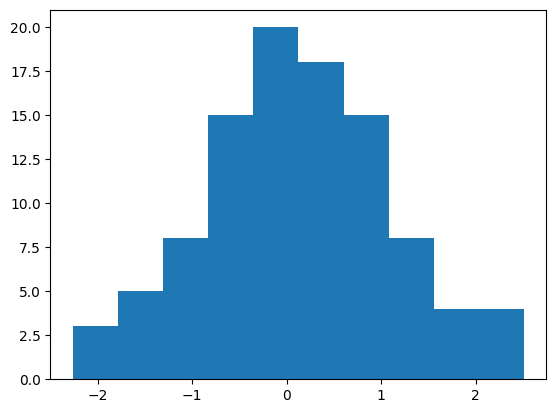

In [92]:
import matplotlib.pyplot as plt
plt.hist(ndata)
plt.show()

### pd.cut()

In [91]:
cutdata = pd.cut(ndata,5) #10개를 2등분해라. 동일 구간 사이즈로 나누기.
cutdata.value_counts()

(-2.266, -1.307]     8
(-1.307, -0.353]    23
(-0.353, 0.601]     38
(0.601, 1.555]      23
(1.555, 2.509]       8
dtype: int64

In [96]:
cutdata = pd.cut([1,2,3,4,5,6,7,8,9,10],5) #동일구간(2등분)으로 나눠준다.
cutdata.value_counts()

#구간이 일정하다. 1.8차이

(0.991, 2.8]    2
(2.8, 4.6]      2
(4.6, 6.4]      2
(6.4, 8.2]      2
(8.2, 10.0]     2
dtype: int64

In [100]:
cutdata.describe()

,counts,freqs
categories,,
"(0.991, 2.8]",2,0.2
"(2.8, 4.6]",2,0.2
"(4.6, 6.4]",2,0.2
"(6.4, 8.2]",2,0.2
"(8.2, 10.0]",2,0.2


In [102]:
my_rage = [0,3,7,10] #0~3 4~7 8~10 내가 지정한 구간화로 하고 싶을 때

res = pd.cut( [1,2,3,4,5,6,7,8,9,10], my_rage)
res.describe()

,counts,freqs
categories,,
"(0, 3]",3,0.3
"(3, 7]",4,0.4
"(7, 10]",3,0.3


In [104]:
my_range = [0,3,7,10] #0~3 4~7 8~10 내가 지정한 구간화로 하고 싶을 때
my_label = ['대','중','소'] #내가 지정한 라벨로 지정하고 싶을 때
res = pd.cut( [1,2,3,4,5,6,7,8,9,10], my_range, labels = my_label)
res.describe()

,counts,freqs
categories,,
대,3,0.3
중,4,0.4
소,3,0.3


### pd.qcut()

In [106]:
np.random.seed(989899) #seed값을 고정시키면 랜덤해도 똑같다. 

ndata = np.random.normal(size = 100)
ndata

array([-8.73861470e-01, -3.87429919e-01, -1.75310983e+00,  7.91707323e-01,
        2.28393269e-01,  1.56692525e+00, -8.43183049e-01, -1.07024581e+00,
       -3.71566444e-01, -6.25877434e-01,  2.29913530e+00,  2.37419282e-01,
       -1.38229128e+00,  1.60021565e-01, -1.16842343e+00,  5.04790881e-01,
       -5.60336003e-01, -1.54300935e+00,  5.15012935e-01, -1.86345653e+00,
        4.93907103e-01,  9.27737330e-01,  1.10596588e-01,  1.52537628e+00,
        6.18928520e-01, -1.69079010e+00,  2.50859030e+00,  1.35180813e+00,
        1.09710686e+00,  2.11149930e-01, -4.93631850e-01, -1.41105845e+00,
        5.86149570e-01, -1.20464507e-01,  6.29820165e-01,  1.30260698e+00,
       -2.26084913e+00, -5.60354436e-01,  3.45981425e-02,  4.47747205e-01,
        5.56297694e-01, -1.25031798e+00,  5.89381889e-01, -8.99368235e-01,
        5.47524448e-01,  9.64114088e-01, -7.50397442e-01, -8.62329121e-01,
        1.72939932e+00,  1.46903831e-01, -2.00594379e+00,  2.79724351e-01,
        1.03823383e+00,  

In [109]:
qdata = pd.qcut(ndata, 5) #카운트 수량을 똑같이 해. 구간은 상관없어.
qdata.describe()

#구간차는 다르지만, 카운트 값은 같다.
#이상, 미만이라서 ( , ]이다.

,counts,freqs
categories,,
"(-2.262, -0.611]",20,0.2
"(-0.611, -0.0828]",20,0.2
"(-0.0828, 0.414]",20,0.2
"(0.414, 0.991]",20,0.2
"(0.991, 2.509]",20,0.2
